In [3]:
import pandas as pd
import numpy as np


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
url = r"C:\Users\Usuario\Desktop\Jack\Ironhack\LABS\week 5\archive.zip"

df = pd.read_csv(url)

In [8]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:
crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [39]:
# Are there categories where being a best-seller is more prevalent?
df1["sum"] = df1["isBestSeller"].sum()

KeyError: 'isBestSeller'

In [41]:
from scipy.stats import chi2_contingency

In [43]:
chi2_contingency(crosstab_result)

Chi2ContingencyResult(statistic=36540.20270061387, pvalue=0.0, dof=295, expected_freq=array([[2.47190130e+02, 8.09870149e-01],
       [4.05371878e+03, 1.32812173e+01],
       [2.49183599e+02, 8.16401360e-01],
       [1.69145827e+03, 5.54173243e+00],
       [2.53170536e+02, 8.29463782e-01],
       [8.50214439e+03, 2.78556144e+01],
       [1.06650580e+02, 3.49419782e-01],
       [2.57157474e+02, 8.42526204e-01],
       [9.51781673e+03, 3.11832664e+01],
       [1.50008526e+04, 4.91473619e+01],
       [9.32544700e+03, 3.05530045e+01],
       [2.38219520e+02, 7.80479700e-01],
       [3.22941944e+03, 1.05805616e+01],
       [9.44704859e+03, 3.09514084e+01],
       [6.68808779e+03, 2.19122125e+01],
       [5.26275760e+02, 1.72423967e+00],
       [1.90296531e+04, 6.23469391e+01],
       [2.77191835e+03, 9.08164873e+00],
       [2.53170536e+02, 8.29463782e-01],
       [4.04674164e+02, 1.32583581e+00],
       [1.92489346e+04, 6.30653723e+01],
       [3.10482764e+03, 1.01723609e+01],
       [2.04

In [45]:
from scipy.stats.contingency import association
association(crosstab_result)

0.1222829439760564

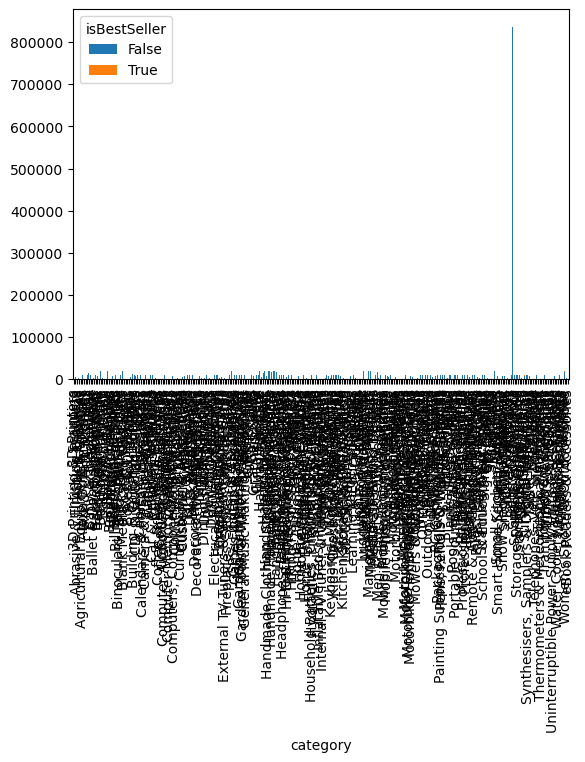

In [47]:
crosstab_result.plot(kind = "bar", stacked = True)
plt.show()

In [49]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [63]:
def price_outliers(data):
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
    
    return outliers

In [77]:
df_price = price_outliers(df)
df_price

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [81]:
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1

In [93]:
filtered_df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]
filtered_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [101]:
filtered_df["price"].mean()

23.408269686190163

In [107]:
filtered_df["category"].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Skiing Poles', 'Downhill Ski Boots', 'Hiking Hand & Foot Warmer

In [133]:
prod_to_filter = ["Pet Supplies", "Boys", "Hi-Fi Speakers", "Ski Goggles"]

filtered_cat = filtered_df[filtered_df["category"].isin(prod_to_filter)]
filtered_cat

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2261799,2610657,B0C7KRKR59,Jikoiuty Bone Conduction Music Box Portable Wi...,0.0,0,15.45,False,0,Hi-Fi Speakers
2261800,2610658,B0C7KFRS6F,ELGE Wireless Bluetooth Sound Subwoofer Wirele...,0.0,0,8.02,False,0,Hi-Fi Speakers
2261801,2610659,B0C7LC855P,"Naroote Mini Stereo Speaker, Mini Portable Spe...",0.0,0,6.93,False,0,Hi-Fi Speakers
2261802,2610660,B0C7L9VQJQ,"Naroote Mini Stereo Speaker, Mini Portable Spe...",0.0,0,6.78,False,0,Hi-Fi Speakers


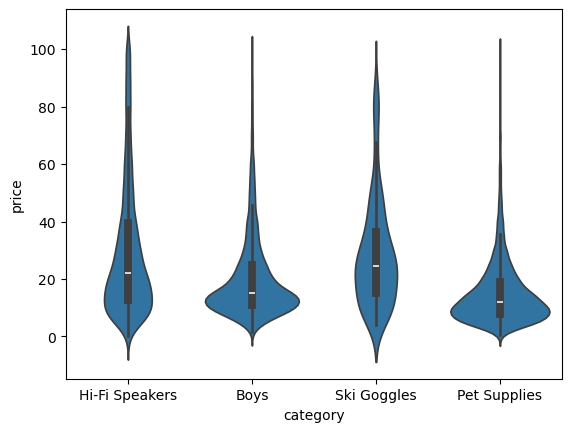

In [137]:
sns.violinplot(data = filtered_cat, x = "category", y = "price")
plt.show()

In [ ]:
###  Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [160]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [172]:
selected_cat = ["category", "price"]

In [206]:
df_category = df[selected_cat]
df_category

,category,price
0,Hi-Fi Speakers,21.99
1,Hi-Fi Speakers,23.99
2,Hi-Fi Speakers,21.99
3,Hi-Fi Speakers,31.99
4,Hi-Fi Speakers,17.99
...,...,...
2443646,Motorbike Clothing,22.34
2443647,Motorbike Clothing,97.99
2443648,Motorbike Clothing,52.99
2443649,Motorbike Clothing,79.99


In [210]:
grouped_mean = df_category.groupby('category')['price'].mean().reset_index()
grouped_mean

,category,price
0,3D Printers,1018.036129
1,3D Printing & Scanning,99.909599
2,Abrasive & Finishing Products,15.801760
3,Action Cameras,135.418598
4,Adapters,8.750197
...,...,...
291,Wind Instruments,391.590480
292,Window Treatments,20.668326
293,Women,22.262394
294,Women's Sports & Outdoor Shoes,73.332266


In [218]:
categories_to_keep = ['Sports & Outdoors', 'Beauty', "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts", "Manicure & Pedicure Products"]  
grouped_mean = grouped_mean[grouped_mean['category'].isin(categories_to_keep)]
grouped_mean

,category,price
16,Bath & Body,15.042266
20,Beauty,13.222322
29,Birthday Gifts,26.585166
116,"Handmade Clothing, Shoes & Accessories",16.865767
177,Manicure & Pedicure Products,10.521108
262,Sports & Outdoors,125.769814


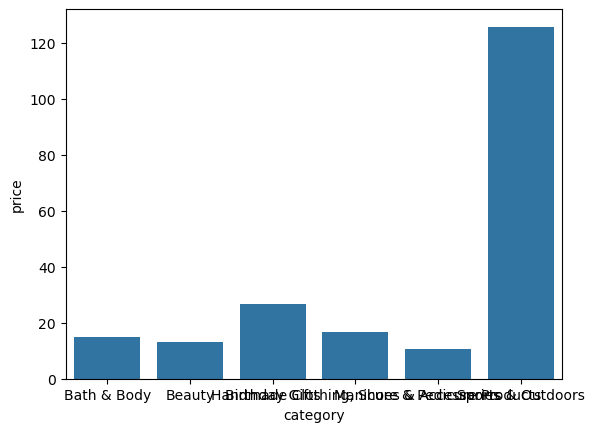

In [220]:
sns.barplot(data = grouped_mean, x = "category", y = "price")
plt.show()

In [226]:
df_category = df["category"].value_counts()

In [228]:
df_cat_10 = df_category.head(10)
df_cat_10

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [230]:
df_top10 = pd.DataFrame(df_cat_10)
df_top10

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


In [234]:
# Convert to DataFrame
df_top10_reset = df_top10.reset_index()
df_top10_reset

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


In [236]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [242]:
selected_cat2 = ["category", "stars"]
df_category2 = df[selected_cat2]
df_category2

,category,stars
0,Hi-Fi Speakers,4.7
1,Hi-Fi Speakers,4.7
2,Hi-Fi Speakers,4.7
3,Hi-Fi Speakers,4.7
4,Hi-Fi Speakers,4.6
...,...,...
2443646,Motorbike Clothing,0.0
2443647,Motorbike Clothing,0.0
2443648,Motorbike Clothing,0.0
2443649,Motorbike Clothing,4.3


In [246]:
df_category22 = df["category"].value_counts()
df_category22

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [256]:
categories_to_keep2 = ['Sports & Outdoors', 'Beauty', "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts", "Manicure & Pedicure Products"] 
df_category3 = df_category2[df_category2['category'].isin(categories_to_keep2)]
df_category3

,category,stars
82163,Sports & Outdoors,4.2
82164,Sports & Outdoors,4.2
82165,Sports & Outdoors,4.5
82166,Sports & Outdoors,4.4
82167,Sports & Outdoors,4.5
...,...,...
2429088,Sports & Outdoors,0.0
2429089,Sports & Outdoors,0.0
2429090,Sports & Outdoors,4.3
2437153,Sports & Outdoors,4.2


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16840\142148665.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_category3, x = "category", y = "stars", palette = "coolwarm")


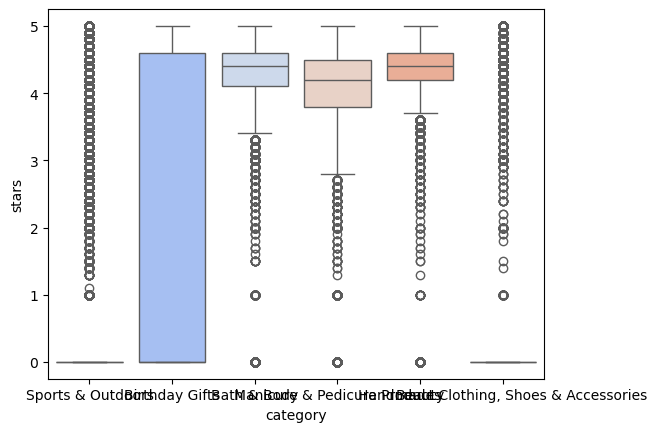

In [258]:
sns.boxplot(data = df_category3, x = "category", y = "stars", palette = "coolwarm")
plt.show()

In [260]:
#Calculate the correlation coefficient between price and stars.

In [262]:
df["price"].corr(df["stars"], method = "pearson")

-0.1249067326214861

In [264]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can yo

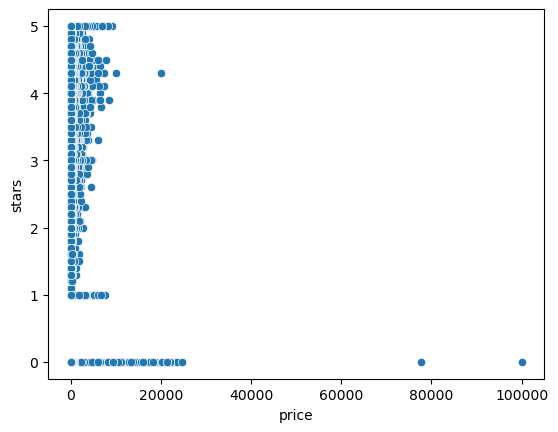

In [268]:
sns.scatterplot(data = df, x = "price", y = "stars")
plt.show()

In [274]:
crosstab_result2 = pd.crosstab(df_category3["stars"], df["category"])
crosstab_result2

category,Bath & Body,Beauty,Birthday Gifts,"Handmade Clothing, Shoes & Accessories",Manicure & Pedicure Products,Sports & Outdoors
stars,,,,,,
0.0,1645,197,11024,14783,2089,692423
1.0,71,11,75,44,114,2173
1.1,0,0,0,0,0,1
1.3,0,1,0,0,1,11
1.4,0,0,0,1,2,42
1.5,7,2,1,1,6,84
1.6,1,1,0,0,2,20
1.7,3,2,0,0,5,27
1.8,1,1,2,1,5,35


<Axes: xlabel='category', ylabel='stars'>

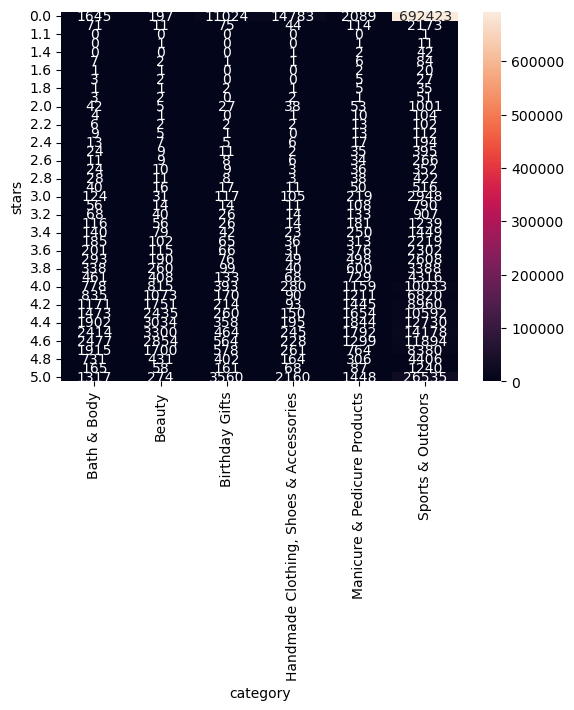

In [276]:
sns.heatmap(crosstab_result2, annot = True, fmt = "d")